This data given by an airline organization.

The dataset consists of the details of customers who have already flown with them. The feedback of the 
customers on various context and their flight data has been consolidated.

The main purpose of this dataset is to predict whether a future customer would be satisfied with their 
service given the details of the other parameters values.

I have performed clustering analysis on this dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
airlines = pd.read_csv('/Users/navyatrilok/Documents/DATASCIENCE/Datasets/Invistico_Airline.csv')
airlines

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


# Exploratory Data Analysis

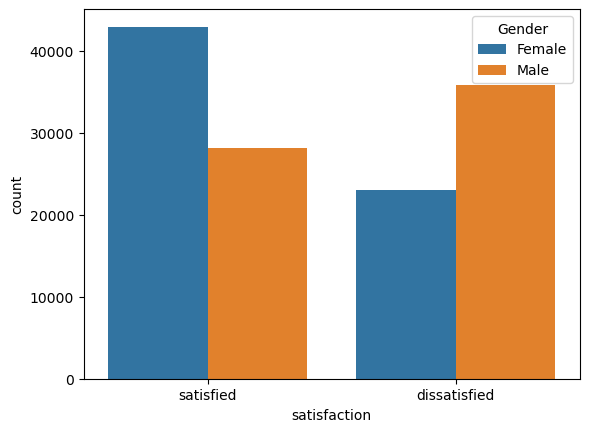

In [4]:
sns.countplot(x='satisfaction',data=airlines,hue='Gender')
plt.show()

In [5]:
airlines.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


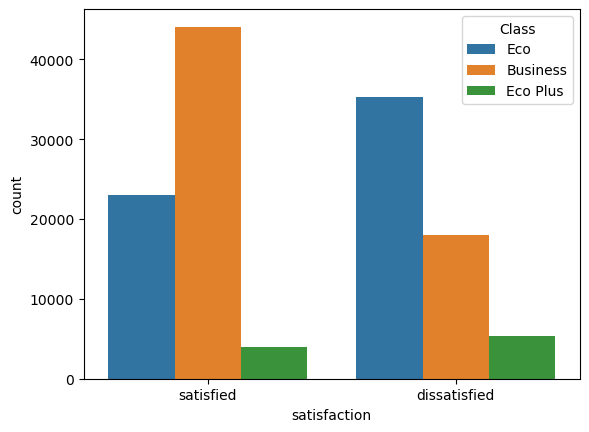

In [6]:
sns.countplot(x='satisfaction',data = airlines, hue='Class')
plt.show()

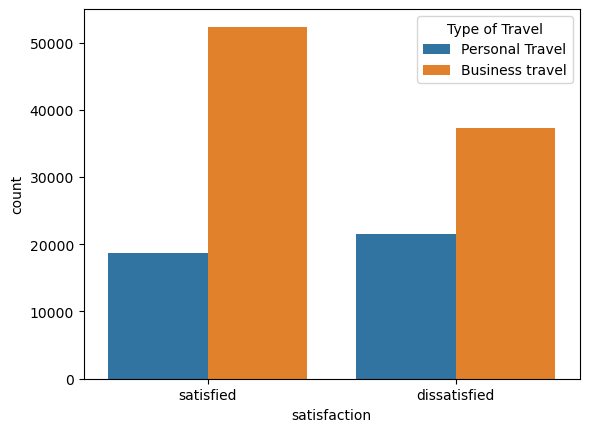

In [7]:
sns.countplot(x='satisfaction',data=airlines, hue='Type of Travel')
plt.show()

In [8]:
airlines.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [9]:
ratings = airlines.loc[:,'Seat comfort':'Online boarding']
ratings.shape

(129880, 14)

In [10]:
ratings

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,0,0,0,2,2,4,2,3,3,0,3,5,3,2
1,0,0,0,3,0,2,2,3,4,4,4,2,3,2
2,0,0,0,3,2,0,2,2,3,3,4,4,4,2
3,0,0,0,3,3,4,3,1,1,0,1,4,1,3
4,0,0,0,3,4,3,4,2,2,0,2,4,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,5,5,5,3,2,5,2,2,3,3,4,4,4,2
129876,2,3,2,4,2,1,1,3,2,3,3,1,2,1
129877,3,0,3,3,3,2,2,4,4,3,4,2,3,2
129878,3,2,3,2,3,2,2,3,3,2,3,2,1,2


In [11]:
ratings.describe()

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587
std,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Here min is 1 max is 5, but we do not want this kind of data, we what to see which ratings are on positive side
and which ratings are on negative side

In [14]:
scaling = StandardScaler()
ratings_scaled = pd.DataFrame(scaling.fit_transform(ratings),columns = ratings.columns)
ratings_scaled.describe()

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
count,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,129880.000000,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05
mean,6.652448e-17,-1.668583e-16,-4.201546e-17,-5.941249e-17,-5.602062e-17,0.000000,1.820670e-16,1.680618e-16,-1.680618e-16,-4.201546e-17,-2.520928e-16,-5.251933e-17,1.190438e-16,-1.260464e-16
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.037791e+00,-1.958230e+00,-1.975443e+00,-2.289818e+00,-2.463679e+00,-2.513627,-2.693982e+00,-2.659487e+00,-2.726622e+00,-2.697605e+00,-2.330931e+00,-2.650220e+00,-3.217449e+00,-2.581476e+00
25%,-6.020176e-01,-6.486598e-01,-5.901365e-01,-7.583833e-01,-9.471627e-01,-1.027802,-3.977808e-01,-1.127571e+00,-3.659618e-01,-1.149883e+00,-6.015440e-01,-2.703578e-01,-6.127608e-01,-1.041485e+00
50%,1.158689e-01,6.125377e-03,1.025167e-01,7.334096e-03,-1.889048e-01,0.458022,3.676197e-01,4.043454e-01,4.209251e-01,3.978403e-01,2.631497e-01,-2.703578e-01,2.554685e-01,4.985049e-01
75%,8.337554e-01,6.609105e-01,7.951700e-01,7.730515e-01,5.693532e-01,0.458022,1.133020e+00,1.170303e+00,4.209251e-01,1.171702e+00,1.127843e+00,5.229295e-01,1.123698e+00,4.985049e-01
max,1.551642e+00,1.315696e+00,1.487823e+00,1.538769e+00,1.327611e+00,1.200935,1.133020e+00,1.170303e+00,1.207812e+00,1.171702e+00,1.127843e+00,1.316217e+00,1.123698e+00,1.268500e+00


all positive values are good ratings, all negative values are bad ratings

mean becomes 0
std becomes 1
6.652448e-17 this is also 0

We need to find out optimal number of clusters

Out main target of clustering algorithm

First we need to find out optimal number of clusters, whether 4 clusters, 3 clusters, client will not give do thme 
into 2 clusters or 3 clusters

Our clustering alogrithm target is to passengers who are having closer ratings, we want to identify those customers
and make clustering

use elbow method, do not go for 20, 30 clusters, because we have high number of samples
it will take lot of time to calculate inertia
inertia is the squared distance between centroid and datapoints

In [50]:
inertia = []
for k in range(2,21):
    model = KMeans(n_clusters=k)
    model.fit(ratings_scaled)
    inertia.append(model.inertia_)
    
    
#case study: datapoijts are more in number

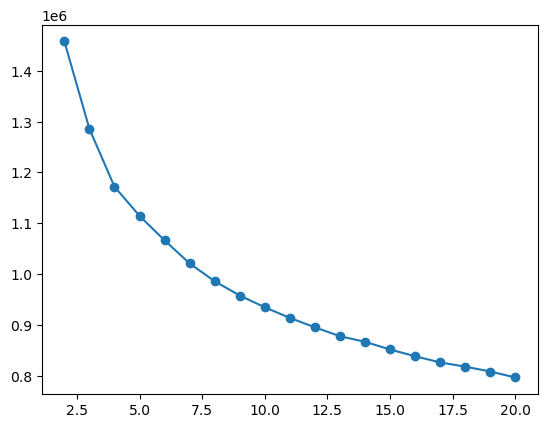

In [51]:
plt.plot(range(2,21),inertia,marker='o')

elbow point is not clear, elbow point decides the number of clusters

#include 1
inertia = []
for k in range(1,21):
    model = KMeans(n_clusters=k)
    model.fit(ratings_scaled)
    inertia.append(model.inertia_)
    
    
#case study: datapoints are more in number

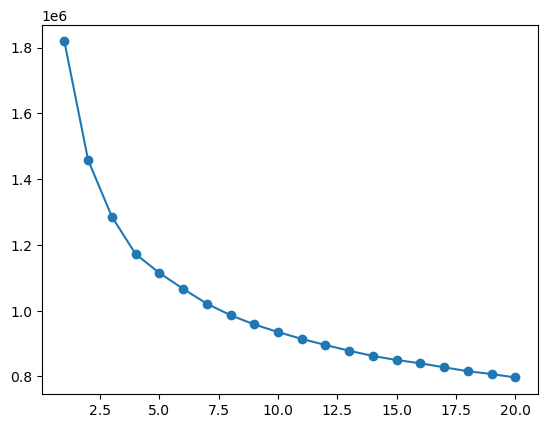

In [18]:
plt.plot(range(1,21),inertia,marker='o')

may 4 is the elbow point, let us take the help of kneed library to decide number of clusters

In [19]:
k1 = KneeLocator(x=range(1,21),y=inertia,curve='convex',direction='decreasing')
k1.elbow

5

In [ ]:
let's verify it by looking at intertia values

In [57]:
inertia

[1818320.0000000051,
 1457532.7018846143,
 1285508.3658399112,
 1171821.9024162546,
 1114424.8334613624,
 1066167.2178712436,
 1020869.5695717372,
 985728.5162728173,
 957720.6728841709,
 934565.8174766642,
 913632.2434403519,
 895240.1274957486,
 879438.6174007093,
 864004.9058493586,
 849488.0713083111,
 838076.5923584606,
 827914.6442868891,
 815646.081021609,
 805534.3670841339,
 797312.0124302316]

In [20]:
model = KMeans(n_clusters = 5)
model.fit(ratings_scaled)
clusters = model.predict(ratings_scaled)


In [21]:
np.unique(clusters,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32),
 array([25162, 34487, 18817, 29096, 22318]))

In [ ]:
It is not exactly dividing into 5 equal parts, which is expected

In [57]:
model = KMeans(n_clusters = 5)
model.fit(ratings_scaled)
clusters = model.predict(ratings_scaled)


In [58]:
np.unique(clusters,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32),
 array([34459, 18831, 29080, 21998, 25512]))

Every time we run we do not get the same results as it is, not even single number matches,

how do we get the insights from this data?

In [24]:
centers = model.cluster_centers_
centers.shape

(5, 14)

In [25]:
centers

array([[-0.69828588, -0.56625413, -0.63469898, -0.37430219, -0.25467534,
        -0.5486964 , -0.31721657, -0.79395172, -1.03790589, -0.940851  ,
        -1.18840554, -0.55648489, -1.18215509, -0.40203543],
       [ 0.56151531,  0.31871603,  0.52813731,  0.40240319,  0.54479239,
         0.31697211,  0.37597619,  0.13212737, -0.7050425 , -0.46692546,
        -0.72987306, -0.33364393, -0.74346323,  0.48249382],
       [ 0.85185618,  0.64088606,  0.75306615,  0.62532901,  0.30078927,
         0.55230646,  0.46438016,  0.66739133,  0.66081545,  0.53994881,
         0.6384315 ,  0.37663226,  0.63873387,  0.42019837],
       [-0.80407744, -0.7634048 , -0.85778935, -0.87055509,  0.39767606,
         0.09752607,  0.50446002,  0.63900562,  0.49904555,  0.39653637,
         0.477539  ,  0.32744473,  0.48196052,  0.50941401],
       [-0.2061075 ,  0.14595719, -0.02908439,  0.07519008, -1.14535357,
        -0.72861282, -1.29619239, -1.16143408, -0.08715745, -0.08454312,
         0.10025361, -0.18

In [ ]:
coordinates of 1st cluster
array([[ 0.85145243,  0.6406814 ,  0.7527138 ,  0.62539965,  0.29988978,
         0.55129634,  0.46358365,  0.66729316,  0.6619492 ,  0.54086088,
         0.63887966,  0.37700977,  0.63936502,  0.41909073],

In [ ]:
co-ordinates of 2nd cluster

[-0.8042572 , -0.76322861, -0.8578462 , -0.87061161,  0.39764408,
         0.09738593,  0.50451736,  0.63909271,  0.49899412,  0.39642987,
         0.47772479,  0.32746529,  0.48205788,  0.50941438],

In [ ]:
co-ordinates of 3rd cluster

 [-0.2072096 ,  0.14502076, -0.03040655,  0.07431295, -1.14637994,
        -0.72921965, -1.29681299, -1.16275458, -0.08804436, -0.0852648 ,
         0.09921401, -0.18470978,  0.10074774, -1.27241442],

In [ ]:
co-ordinates of 4th cluster
[-0.69509669, -0.56508276, -0.63171335, -0.37345201, -0.25200574,
        -0.54484207, -0.31446495, -0.7917475 , -1.03825267, -0.93906464,
        -1.18891335, -0.55585192, -1.1820265 , -0.39899186],

In [ ]:
co-ordinates of 5th cluster

  [ 0.56412469,  0.32122292,  0.53061841,  0.40464029,  0.5468269 ,
         0.31845685,  0.37733994,  0.13465507, -0.70312253, -0.46668167,
        -0.72661236, -0.3323873 , -0.74074269,  0.48443065]])

In [26]:
centers = pd.DataFrame(centers,columns=ratings.columns)
centers

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,-0.698286,-0.566254,-0.634699,-0.374302,-0.254675,-0.548696,-0.317217,-0.793952,-1.037906,-0.940851,-1.188406,-0.556485,-1.182155,-0.402035
1,0.561515,0.318716,0.528137,0.402403,0.544792,0.316972,0.375976,0.132127,-0.705043,-0.466925,-0.729873,-0.333644,-0.743463,0.482494
2,0.851856,0.640886,0.753066,0.625329,0.300789,0.552306,0.464380,0.667391,0.660815,0.539949,0.638431,0.376632,0.638734,0.420198
3,-0.804077,-0.763405,-0.857789,-0.870555,0.397676,0.097526,0.504460,0.639006,0.499046,0.396536,0.477539,0.327445,0.481961,0.509414
4,-0.206108,0.145957,-0.029084,0.075190,-1.145354,-0.728613,-1.296192,-1.161434,-0.087157,-0.084543,0.100254,-0.183769,0.101963,-1.271798


0.851856 highly positive

cluster 4 is highly on negative side

-0.029084 is highly on negative side

This is how we are mathematically solving problems. These are closer to the centroid having the seat comfort value
at 0.8 which is on positive side, that means they are highly satisfied with seat comfort

this 0.8 is when it is compared with average rating it is on the positive side

Eg., 3 cluster are highly dissatisfied on seat comfort because -0.8, others -0.6, -0.2 are also dissatisfied
but these people are highly dissatisfied. Because they are more away from the mean value

kneed said 5 clusters are better, lets try 4

In [59]:
model = KMeans(n_clusters = 4)
model.fit(ratings_scaled)
clusters = model.predict(ratings_scaled)


In [60]:
np.unique(clusters,return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([28694, 29646, 30144, 41396]))

In [61]:
centers = model.cluster_centers_
centers.shape

(4, 14)

In [62]:
centers = pd.DataFrame(centers,columns=ratings.columns)
centers

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,-0.318668,0.007221,-0.167829,0.002367,-1.136760,-0.819838,-1.276089,-1.164299,-0.206389,-0.174264,-0.041838,-0.262805,-0.036808,-1.258185
1,-0.795077,-0.755532,-0.854324,-0.858325,0.392684,0.074846,0.497526,0.643355,0.501136,0.398179,0.481699,0.320583,0.487057,0.504786
2,-0.105377,-0.140242,-0.058614,-0.025826,0.217929,-0.056573,0.098330,-0.357063,-0.971991,-0.797544,-1.084365,-0.468666,-1.097873,0.093960
3,0.867045,0.638391,0.770997,0.632132,0.347306,0.555325,0.455723,0.605246,0.491280,0.415839,0.473032,0.293402,0.475540,0.441302


With 5 cluster we are slightly doubtful on + and - of the datapoints to made it 4 clusters

now we can see highly +ves and highly -ves
This is the way to understand customer is satisfied or not

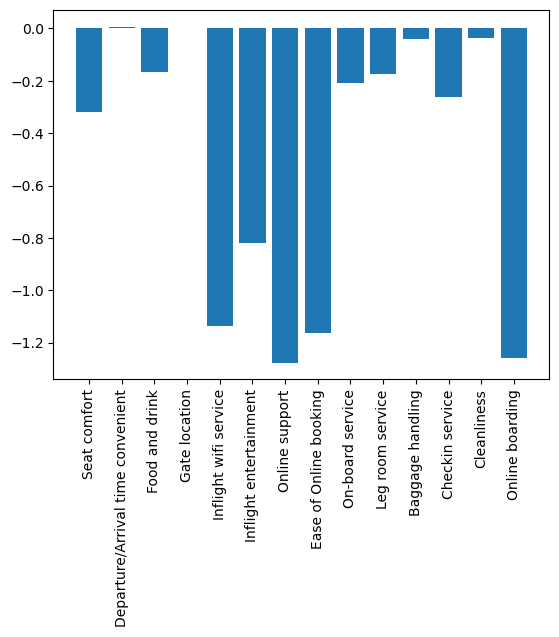

In [68]:
plt.bar(x=centers.columns,height=centers.iloc[0])
plt.xticks(rotation=90)
plt.show()

all are on negative side

inflight service,online sport,online boarding are also highly -ve
This is for cluster 0

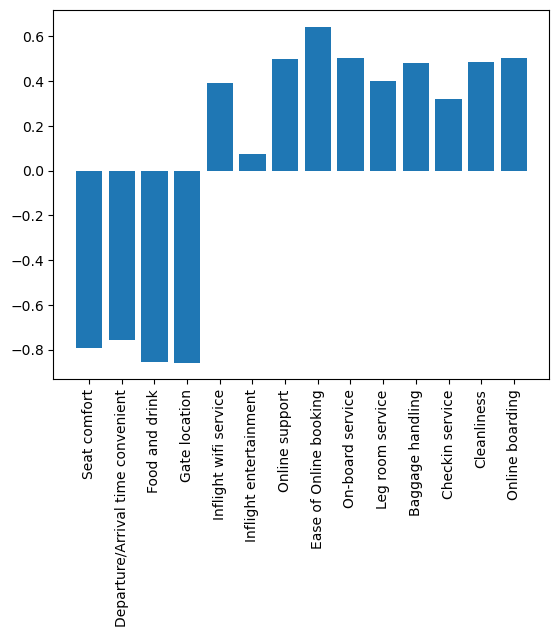

In [69]:
plt.bar(x=centers.columns,height=centers.iloc[1])
plt.xticks(rotation=90)
plt.show()

In [ ]:
This is for cluster 1
Cluster 0 many are unsatisfied
cluster 1 some satisfied some unsatisfied

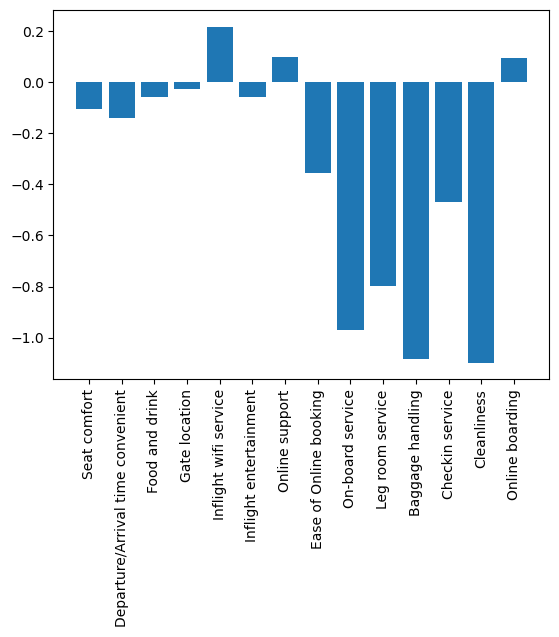

In [70]:
plt.bar(x=centers.columns,height=centers.iloc[2])
plt.xticks(rotation=90)
plt.show()

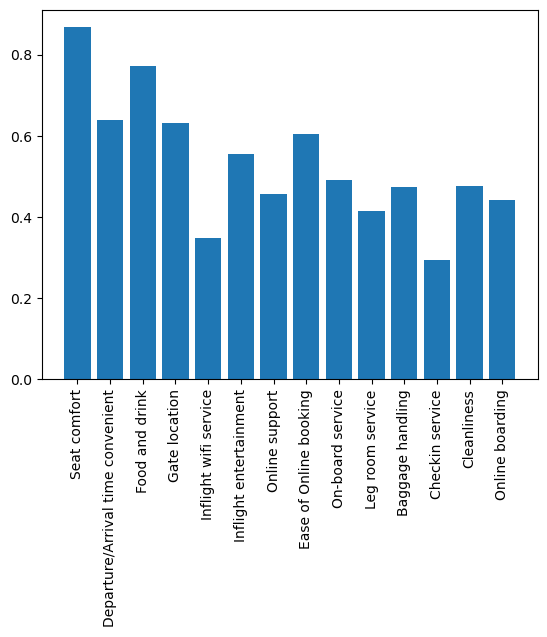

In [71]:
plt.bar(x=centers.columns,height=centers.iloc[3])
plt.xticks(rotation=90)
plt.show()

All are highly satisfied
all 4 clusters gave 4 diff characterists

cluster 0 says higly dissatisfied --> no +ve sign
cluste 3 says highly satisfied --> no -ve side

othere clusters mix of both

Clustering is only telling the these are the clusters I have formed.
Now the main analysis starts
based on this particular insights we do cluster analysis

In [ ]:
Clustering

In [72]:
cluster_0 = airlines[clusters==0]
cluster_0

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129866,satisfied,Female,disloyal Customer,18,Personal Travel,Eco,1243,5,0,5,...,2,2,4,5,5,3,5,2,0,0.0
129868,satisfied,Female,disloyal Customer,45,Personal Travel,Eco,1612,5,2,5,...,2,2,2,5,4,3,4,2,0,0.0
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0


28694  --> (array([0, 1, 2, 3], dtype=int32), array([28694, 29646, 30144, 41396]))

These are highly dissatisfied

In [77]:
cluster_0.satisfaction.value_counts(normalize=True)

satisfaction
dissatisfied    0.796717
satisfied       0.203283
Name: proportion, dtype: float64

observation:

more dissatisfied people in cluster0 almost all 80%

In [75]:
cluster_3 = airlines[clusters==3]
cluster_3

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
1293,satisfied,Female,Loyal Customer,63,Personal Travel,Eco,729,4,0,4,...,4,5,5,4,2,4,5,4,0,0.0
1302,satisfied,Female,Loyal Customer,33,Personal Travel,Eco Plus,2133,4,0,4,...,4,4,4,5,5,4,5,4,0,0.0
1304,satisfied,Female,Loyal Customer,27,Personal Travel,Eco,2543,4,0,4,...,5,5,5,4,5,4,5,3,0,0.0
1305,satisfied,Female,Loyal Customer,53,Personal Travel,Eco,648,4,0,4,...,5,4,4,4,5,3,4,4,0,0.0
1353,satisfied,Female,Loyal Customer,27,Personal Travel,Eco,1832,4,1,4,...,4,5,5,4,5,3,5,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129871,satisfied,Female,disloyal Customer,35,Personal Travel,Eco,3287,5,4,5,...,2,2,4,5,4,4,3,2,9,0.0
129872,satisfied,Female,disloyal Customer,69,Personal Travel,Eco,2240,5,4,5,...,4,4,5,4,4,3,4,4,4,0.0
129873,satisfied,Female,disloyal Customer,63,Personal Travel,Eco,1942,5,5,4,...,3,3,5,2,5,3,5,3,7,NaN
129874,satisfied,Female,disloyal Customer,11,Personal Travel,Eco,2752,5,5,5,...,2,2,3,5,3,5,4,2,5,0.0


In [78]:
cluster_3.satisfaction.value_counts(normalize=True)
#41396

satisfaction
satisfied       0.809305
dissatisfied    0.190695
Name: proportion, dtype: float64

observations

more satisfied people in cluster_3, almost all 80%

observation:

these 20 are people overall satisfied but some of the features they gave -ve ratings

In [79]:
cluster_0['Class'].value_counts()

Class
Eco         17437
Business     8503
Eco Plus     2754
Name: count, dtype: int64

In [ ]:
Majority of the customers who are dissatisfied are from economy class

In [80]:
cluster_3['Class'].value_counts()

Class
Business    23724
Eco         15192
Eco Plus     2480
Name: count, dtype: int64

Observations:
Majority customers satisfied are from business class

Economy not satisfied
Business class satisfied

In [83]:
cluster_3.Age.describe()

count    41396.000000
mean        40.783288
std         14.610973
min          7.000000
25%         30.000000
50%         42.000000
75%         52.000000
max         85.000000
Name: Age, dtype: float64

We have to do lot of analysis

in supervised learning we have target
here it is not like that
If we have too many clusters, too much analysis will come

In [85]:
cluster_2 = airlines[clusters==2]
cluster_2

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
10,satisfied,Female,Loyal Customer,58,Personal Travel,Eco,104,0,0,0,...,3,3,3,0,1,2,3,5,47,48.0
12,satisfied,Male,Loyal Customer,62,Personal Travel,Eco,1695,0,0,0,...,5,5,1,3,2,2,4,5,0,0.0
16,satisfied,Female,Loyal Customer,13,Personal Travel,Eco,3693,0,1,0,...,4,4,4,4,1,3,1,4,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129838,dissatisfied,Female,disloyal Customer,31,Personal Travel,Eco,2225,3,4,3,...,5,5,3,1,3,4,3,5,69,60.0
129846,dissatisfied,Female,disloyal Customer,7,Personal Travel,Eco,1616,3,5,3,...,4,3,5,1,4,3,1,3,0,15.0
129863,satisfied,Female,disloyal Customer,52,Personal Travel,Eco,1602,4,5,4,...,3,4,3,2,2,2,1,4,0,0.0
129869,satisfied,Female,disloyal Customer,55,Personal Travel,Eco,1953,5,2,5,...,5,1,1,1,3,3,4,1,0,0.0


In [88]:
cluster_2.satisfaction.value_counts(normalize=True)

satisfaction
dissatisfied    0.665307
satisfied       0.334693
Name: proportion, dtype: float64

In [89]:
cluster_2.Age.describe()

count    30144.000000
mean        40.439159
std         15.307877
min          7.000000
25%         28.000000
50%         40.000000
75%         52.000000
max         85.000000
Name: Age, dtype: float64

In [ ]:
avg age is 40

In [90]:
cluster_2['Class'].value_counts()

Class
Eco         15419
Business    12064
Eco Plus     2661
Name: count, dtype: int64

In [96]:
cluster_2.groupby(['satisfaction','Class','Gender']).size()

satisfaction  Class     Gender
dissatisfied  Business  Female    3677
                        Male      3985
              Eco       Female    4735
                        Male      5960
              Eco Plus  Female     891
                        Male       807
satisfied     Business  Female    2260
                        Male      2142
              Eco       Female    3090
                        Male      1634
              Eco Plus  Female     556
                        Male       407
dtype: int64

In [97]:
cluster_0.groupby(['satisfaction','Class','Gender']).size()

satisfaction  Class     Gender
dissatisfied  Business  Female     2865
                        Male       3034
              Eco       Female     4280
                        Male      10340
              Eco Plus  Female      750
                        Male       1592
satisfied     Business  Female     1317
                        Male       1287
              Eco       Female     1745
                        Male       1072
              Eco Plus  Female      264
                        Male        148
dtype: int64

we can't say we will get useful information
but we have to do analysis
males who are dissatified in economy are more numbers

Observations:

Improvement is not needed on the business class

improvement is needed on economy class
